<center>
    <hr> 
    <h1> 2º algoritimo: Agrupamento K-means </h1>
    <br>
    <I> Feito por Yasmin Miranda </I>
    <hr> 
</center>

<center>
    <font size = "4" color = "#003666"> <B> Importando bibliotecas necessárias: </B> </font> 
</center>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #estilo de todos os gráficos para sns
from sklearn.cluster import KMeans

<center>
<font size = "4" color = "#003666"> <B> Lendo, editando e visualizando a base de dados: </B> </font> 
</center>

In [2]:
exemplo2 = pd.read_csv("3.12. Example.csv")
exemplo2.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Dados de supermercado fictício. Foi avaliado a satisfação e lealdade dos clientes:
    
Satisfaction = satisfação do cliente, com o auto-relato. Em uma escala de 1  a 10, cliente concordava com "De maneira geral, eu estou satisfeito com ABC Inc". 
    
    Nenhum pouco satisfeito = 1 e Extremamente satisfeito = 10
    
Loyalty = lealdade a marca, foi medida atraves de numero de compras feitas em um ano e outros fatores. Padronizado, entre -2.5 e 2.5

Text(0, 0.5, 'Lealdade')

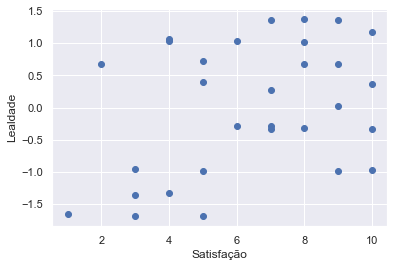

In [3]:
plt.scatter(exemplo2['Satisfaction'],exemplo2['Loyalty'])
plt.xlabel('Satisfação')
plt.ylabel('Lealdade')

Podemos identificar 4 grupos de maneira intuitiva, aqueles que possuem:
1. Baixa satisfação e baixa lealdade
2. Baixa satisfação e alta lealdade
3. Alta satisfação e baixa lealdade ou.
4. Alta satisfação e alta lealdade

In [4]:
x = exemplo2.copy()
kmeans = KMeans(2)
kmeans.fit(x)
clusteres = x.copy()
clusteres['clusteres_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Lealdade')

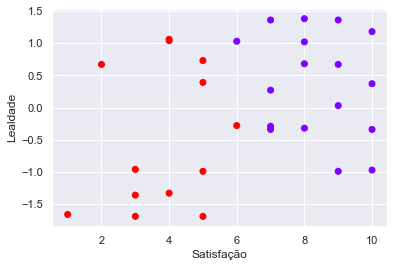

In [5]:
plt.scatter(clusteres['Satisfaction'], clusteres['Loyalty'], c=clusteres['clusteres_pred'], cmap='rainbow')
plt.xlabel('Satisfação')
plt.ylabel('Lealdade')

<center>
<font size = "4" color = "#003666"> <B> Padronizando variável Satisfação </B> </font> 
</center>

In [6]:
from sklearn import preprocessing

x_padr = preprocessing.scale(x)

<center>
<font size = "4" color = "#003666"> <B> Utilizando método "Cotovelo" </B> </font> 
</center>

C:\Users\yasmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Soma de Quadrados Entre os Grupos')

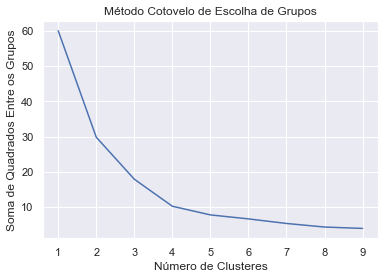

In [7]:
sqg = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_padr)
    sqg.append(kmeans.inertia_)
    
plt.plot(range(1,10), sqg)
plt.title("Método Cotovelo de Escolha de Grupos")
plt.xlabel("Número de Clusteres")
plt.ylabel("Soma de Quadrados Entre os Grupos")

<center>
<font size = "4" color = "#003666"> <B> Analisando K=2 com dados padronizados </B> </font> 
</center>

In [8]:
kmeans_novo = KMeans(2)
kmeans_novo.fit(x_padr)
clusteres_novo= x.copy()
clusteres_novo['clusteres_pred'] = kmeans_novo.fit_predict(x_padr)

Text(0, 0.5, 'Lealdade')

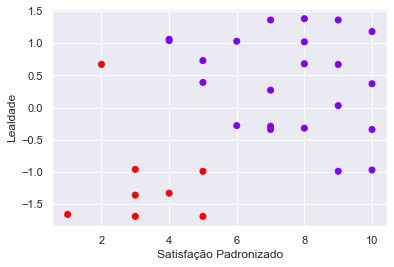

In [9]:
plt.scatter(clusteres_novo['Satisfaction'], clusteres_novo['Loyalty'], c=clusteres_novo['clusteres_pred'], cmap='rainbow')
plt.xlabel('Satisfação Padronizado')
plt.ylabel('Lealdade')

<center>
<font size = "4" color = "#003666"> <B> Explorando opções de K=k </B> </font> 
</center>

Text(0, 0.5, 'Lealdade')

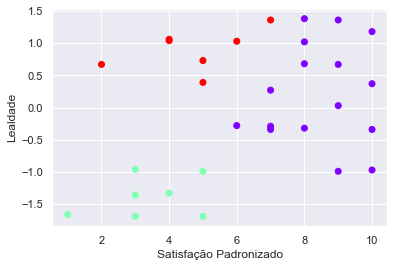

In [10]:
kmeans_novo = KMeans(3)
kmeans_novo.fit(x_padr)
clusteres_novo= x.copy()
clusteres_novo['clusteres_pred'] = kmeans_novo.fit_predict(x_padr)
plt.scatter(clusteres_novo['Satisfaction'], clusteres_novo['Loyalty'], c=clusteres_novo['clusteres_pred'], cmap='rainbow')
plt.xlabel('Satisfação Padronizado')
plt.ylabel('Lealdade')

Text(0, 0.5, 'Lealdade')

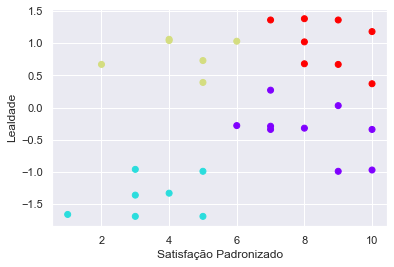

In [11]:
kmeans_novo = KMeans(4)
kmeans_novo.fit(x_padr)
clusteres_novo= x.copy()
clusteres_novo['clusteres_pred'] = kmeans_novo.fit_predict(x_padr)
plt.scatter(clusteres_novo['Satisfaction'], clusteres_novo['Loyalty'], c=clusteres_novo['clusteres_pred'], cmap='rainbow')
plt.xlabel('Satisfação Padronizado')
plt.ylabel('Lealdade')

Text(0, 0.5, 'Lealdade')

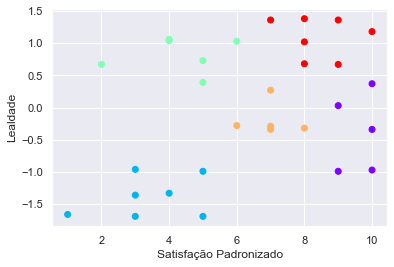

In [12]:
kmeans_novo = KMeans(5)
kmeans_novo.fit(x_padr)
clusteres_novo= x.copy()
clusteres_novo['clusteres_pred'] = kmeans_novo.fit_predict(x_padr)
plt.scatter(clusteres_novo['Satisfaction'], clusteres_novo['Loyalty'], c=clusteres_novo['clusteres_pred'], cmap='rainbow')
plt.xlabel('Satisfação Padronizado')
plt.ylabel('Lealdade')

<B> Comentários </B>: <br>
<br>    

Recomendo o uso de K=4 pois distingue melhor o perfil dos clientes e, de acordo com o gráfico que analisa a soma de quadrados entre os grupos em função do número de K, é uma das opções mais relevantes